# Assignment 3 - Acquiring Data

## Part 1 - Ask a question!

how much has the apple stock increased since 2014?

## _Notes_

## Find data set/s related to that question
There are a lot of open data sets out there that you can access. Some places that you can find data sets are listed below, but there are plenty of data sets out there.

1. Kaggle - Lots of interesting data sets  https://www.kaggle.com/datasets
1. UC Irvine Machine Learning Repo - A venerable source of data.  Some what dated now.  http://mlr.cs.umass.edu/ml/
1. US government.  The open data sets from the US government. https://catalog.data.gov/dataset (_Many organinizations/governments make data sets available. I have given three, but check around for others._) 
1. UK data sets https://www.ukdataservice.ac.uk
1. IMF data setshttps://www.imf.org/en/Data
1. Amazon AWS data sets - Data sets that can be aquired through AWS services https://registry.opendata.aws
1. Wikipedia list of data sets - https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research
1. 538 - Politics and sports opinions https://fivethirtyeight.com
1. Awesome data - a collection of data sets on github https://github.com/awesomedata/awesome-public-datasets

One final option is to scrape data from existing web sites and build your own data set.

## Part 2 - Acquire the data
You may want to create a work space and then download the data set into the workspace so you have a local copy to work with.  If you are working with a very large data set, you may choose to only download a part of the set.

# _Notes_


URL:kaggle.com

## Look at the forrest of the data
At this point we want to look at the overall picture of the data.  We are not yet trying to do a detailed analysis, but there are some basic questions we want to answer about our data set.

1. In each record of data what are the features?

date high low open close volume unadjustedVolume change changePercent vwap label(date again) changeOverTime
2. What are the range of values (min, median/average, max)
see the table on part 6. it looks weird copied and pasted

3. Do I have values that are not numeric?
some dates and percentages. mostly numeric
4. Do I have records that are missing features?
all records are nonnull and filled up

# Part 3 - Read the CSV into a DataFrame

Now that we have a CSV file to work with, lets use pandas to examine the data.

The first thing we will do is to pull all the data from the CSV file into a pandas dataframe and then look at the keys and the first five lines using the head() function.

In [1]:
import pandas as pd
data = pd.read_csv("AAPL.csv")
data.head()

,date,open,high,low,close,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2014-01-30,65.8882,66.4074,65.1226,65.5266,169762789,24251827,-0.126916,-0.193,71.9614,"Jan 30, 14",0.000000
1,2014-01-31,64.9233,65.7558,64.7096,65.6339,116336444,16619492,0.107251,0.164,71.6528,"Jan 31, 14",0.001638
2,2014-02-03,65.8974,66.5687,65.4634,65.7558,100620772,14374396,0.121932,0.186,65.9462,"Feb 3, 14",0.003498
3,2014-02-04,66.3222,66.7955,65.9171,66.7077,94273543,13467649,0.951860,1.448,67.9120,"Feb 4, 14",0.018025
4,2014-02-05,66.4153,67.5586,66.3749,67.2059,82322156,11760308,0.498221,0.747,67.1585,"Feb 5, 14",0.025628


## _Notes_ 


## Part 4 - Quick Overview
Lets get a quick overview of the data using the info() function.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
date                1258 non-null object
open                1258 non-null float64
high                1258 non-null float64
low                 1258 non-null float64
close               1258 non-null float64
volume              1258 non-null int64
unadjustedVolume    1258 non-null int64
change              1258 non-null float64
changePercent       1258 non-null float64
vwap                1258 non-null float64
label               1258 non-null object
changeOverTime      1258 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 118.0+ KB


## _Notes_
all non null so they must have data in them 

## Part 5 - Look at the object fields
We can pull out information about the Gender field using the value_counts() method

In [3]:
data['open'].value_counts()

118.9103    2
155.0072    2
118.3579    2
117.8336    2
91.5512     2
110.5156    2
174.6775    2
190.4452    2
90.8038     2
110.2706    2
153.5794    2
111.5829    2
109.5962    2
112.3749    2
103.8916    2
116.3538    2
167.6431    2
95.0062     2
88.1126     2
150.5873    2
104.6961    2
185.0530    2
112.2815    2
157.5000    2
186.6915    2
89.2302     2
109.3927    1
110.3092    1
104.4351    1
113.0626    1
           ..
93.5002     1
101.3097    1
119.9403    1
173.5741    1
103.5951    1
90.2034     1
227.1674    1
101.8702    1
142.9177    1
92.0511     1
154.2000    1
140.1423    1
69.7449     1
217.3018    1
182.8187    1
118.0302    1
110.5490    1
117.5548    1
106.1764    1
140.5124    1
170.7958    1
108.4860    1
126.5736    1
178.3700    1
171.5938    1
103.2412    1
117.8804    1
118.6549    1
90.1897     1
120.5489    1
Name: open, Length: 1232, dtype: int64

## _Notes_
could look at the amount of times a specific thing happened.

## Part 6 - Look at the numerical fields
We can look at numerical fields using the describe() function. We get some basic information.

In [4]:
data.describe()

,open,high,low,close,volume,unadjustedVolume,change,changePercent,vwap,changeOverTime
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000
mean,127.943792,129.049331,126.820980,127.964891,4.199825e+07,3.759173e+07,0.070769,0.079814,127.982681,0.952869
std,38.677967,39.036716,38.294054,38.663478,2.192838e+07,2.038429e+07,2.109995,1.527023,38.651609,0.590042
min,64.923300,65.755800,64.709600,65.526600,1.147592e+07,5.704942e+06,-15.730000,-9.961000,57.582200,0.000000
25%,100.031550,101.326975,99.192350,99.896675,2.645360e+07,2.412655e+07,-0.728529,-0.605750,100.245275,0.524521
50%,115.146650,116.407000,114.623050,115.426500,3.642551e+07,3.357334e+07,0.069177,0.065000,115.472200,0.761521
75%,156.341275,157.687075,154.762400,156.339075,5.116842e+07,4.670206e+07,1.039350,0.860500,156.471400,1.385887
max,229.977600,232.658200,228.981100,231.263100,1.899781e+08,1.898463e+08,11.132000,8.198000,231.426900,2.529301


## _Notes_


## Part 7 - Get Distributions
To really understand what is going on in the data, we will need to see a distribution. One of the common ways of doing this is to use a histogram. 

In [5]:
import matplotlib.pyplot as plt
data.hist(bins=10)
plt.show()

<Figure size 640x480 with 12 Axes>

## _Notes_
  

## Part 8 Visualize the data
Lets make a copy of the data set and do some simple graphs.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024102EA7F28>,
      dtype=object)

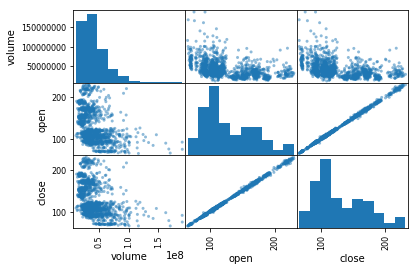

In [6]:
from pandas.plotting import scatter_matrix
attributes = ["date", "volume", "open", "close"]
scatter_matrix(data[attributes])

## _Notes_  

high correlation between open and close?


## Part 9 - Do Correlation

Check the numerical parameters and see if any are strongly correlated.  This can give an idea of dimensions that are predictive of each other.

In [7]:
corr = data.corr()
print(corr)

                      open      high       low     close    volume  \
open              1.000000  0.999616  0.999496  0.999118 -0.410753   
high              0.999616  1.000000  0.999382  0.999564 -0.403429   
low               0.999496  0.999382  1.000000  0.999600 -0.421881   
close             0.999118  0.999564  0.999600  1.000000 -0.414030   
volume           -0.410753 -0.403429 -0.421881 -0.414030  1.000000   
unadjustedVolume -0.136369 -0.128684 -0.148844 -0.140482  0.675131   
change           -0.020344 -0.008081 -0.001828  0.011866 -0.081053   
changePercent    -0.031562 -0.019648 -0.014338 -0.000932 -0.050293   
vwap              0.999498  0.999746  0.999720  0.999732 -0.411664   
changeOverTime    0.999118  0.999564  0.999600  1.000000 -0.414030   

                  unadjustedVolume    change  changePercent      vwap  \
open                     -0.136369 -0.020344      -0.031562  0.999498   
high                     -0.128684 -0.008081      -0.019648  0.999746   
low       

## _Notes_
i have some high correlations


## Part 10 - A better scatter plot
Look to see if there are interesting relations to the non-numeric data.  Try some filtering.

going to try to compare the instances where the stock lowered that day and where the stock went up that day. gonna use the change attribute.

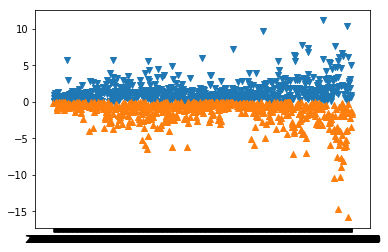

In [13]:
import matplotlib.pyplot as plt
import numpy as np

ups = np.ma.masked_where(data["change"]> 0 , data["change"])
downs = np.ma.masked_where(data["change"] < 0 , data["change"])

plt.scatter(x = data["date"],y = downs,marker = "v" )
plt.scatter(x =data["date"] , y =ups, marker = "^" )
plt.show()

## _Notes_
still cannot figure this error out.
needed to add["change"] to data
also made a scatter for each mask

# Bonus
Do an acquisition and preliminary analysis on a second data set.  Compare the data sets.


to compare datasets i would say that the apple dataset is overall better for understanding how this works.

The first dataset was about something i really dont understand and it had lots of columns that i did not really know what to do with. 

With the apple dataset i have a general idea of the types of data and their meanings. 

other things i noticed. Date and label are the same thing. i dont know what vwap is. just looked it up. its volume weighted average price.

if i am right i think there is a high correlation between open high low and others. I think this is because when a stock opens in a day the price should not go to far away from the opening price. Not sure what i can do with this data.